In [1]:
%pylab inline
from bagnets.utils import plot_heatmap, generate_heatmap_pytorch

Populating the interactive namespace from numpy and matplotlib


In [2]:
# load model
import bagnets.pytorch
pytorch_model = bagnets.pytorch.bagnet33(pretrained=True).cuda()
pytorch_model.eval()

In [3]:
# load an imagenet sample
# we use foolbox for simplicity here
from foolbox.utils import samples
original, label = samples(dataset='imagenet', index=1, batchsize=1, shape=(224, 224), data_format='channels_first')

# preprocess sample image
sample = original / 255.
sample -= np.array([0.485, 0.456, 0.406])[:, None, None]
sample /= np.array([0.229, 0.224, 0.225])[:, None, None]

In [4]:
# generate heatmap
heatmap = generate_heatmap_pytorch(pytorch_model, sample, label, 33)

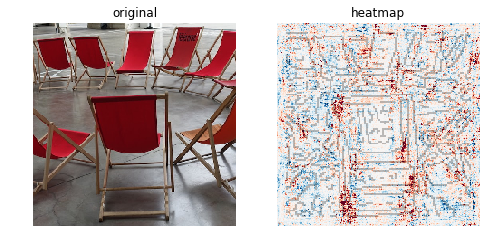

In [5]:
# plot heatmap
fig = figure(figsize=(8, 4))

original_image = original[0].transpose([1,2,0])

ax = plt.subplot(121)
ax.set_title('original')
imshow(original_image / 255.)
plt.axis('off')

ax = plt.subplot(122)
ax.set_title('heatmap')
plot_heatmap(heatmap, original_image, ax, dilation=0.5, percentile=99, alpha=.25)
plt.axis('off')

plt.show()